In [103]:
import pandas as pd
import numpy as np

In [104]:
df=pd.read_csv('dataset_phishing.csv')

In [105]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [107]:
mapping={'legitimate':0,'phishing':1}
df['status'] = df['status'].map(mapping)

In [108]:
df['status'].value_counts()

status
0    5715
1    5715
Name: count, dtype: int64

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import sklearn.metrics as metrics
from scipy.stats import randint, uniform
import pickle
from xgboost import XGBClassifier

In [110]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
length_url,1.000000,0.223025,0.453961,0.443589,0.399564,0.150739,0.520930,0.576268,NaN,0.621745,...,0.125159,-0.006476,-0.007082,0.002799,-0.006798,0.072205,0.023357,0.236395,-0.102582,0.248580
length_hostname,0.223025,1.000000,0.252013,0.408956,0.057702,0.071793,0.162400,0.145617,NaN,0.183405,...,0.217284,0.074707,-0.097794,-0.041081,0.013854,0.163238,-0.023344,0.213990,-0.159342,0.238322
ip,0.453961,0.252013,1.000000,0.288398,0.109860,0.059401,0.405434,0.383262,NaN,0.440972,...,0.137716,0.014561,0.053246,-0.108869,-0.077020,0.167930,0.127823,0.270743,-0.218968,0.321698
nb_dots,0.443589,0.408956,0.288398,1.000000,0.045099,0.263283,0.347411,0.435798,NaN,0.414902,...,0.107789,0.055560,0.056407,-0.024117,-0.007818,0.087969,0.126659,0.209616,-0.097312,0.207029
nb_hyphens,0.399564,0.057702,0.109860,0.045099,1.000000,0.018770,0.036804,0.120487,NaN,0.107050,...,0.006909,0.020297,-0.055794,0.038163,0.080104,-0.041464,-0.031477,-0.018828,0.104341,-0.100107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
web_traffic,0.072205,0.163238,0.167930,0.087969,-0.041464,-0.009459,0.143777,0.164797,NaN,0.187809,...,0.081786,0.083888,0.022598,-0.110435,-0.096698,1.000000,-0.007113,0.034099,-0.209526,0.060388
dns_record,0.023357,-0.023344,0.127823,0.126659,-0.031477,0.031611,0.009441,0.076372,NaN,0.052159,...,0.062084,0.043817,0.213899,-0.060811,-0.068023,-0.007113,1.000000,0.096413,-0.142135,0.122119
google_index,0.236395,0.213990,0.270743,0.209616,-0.018828,0.113217,0.201260,0.129093,NaN,0.167385,...,0.267465,-0.143655,0.040633,-0.134656,-0.210111,0.034099,0.096413,1.000000,-0.389887,0.731171
page_rank,-0.102582,-0.159342,-0.218968,-0.097312,0.104341,-0.066356,-0.123852,-0.126164,NaN,-0.133089,...,-0.330810,0.058843,-0.155990,0.345751,0.589602,-0.209526,-0.142135,-0.389887,1.000000,-0.511137


In [111]:
target_corr = corr_matrix['status']
target_corr
min_corr = target_corr.min()
max_corr = target_corr.max()

# Print the range of values
print(f"The range of values in target_corr is from {min_corr} to {max_corr}")

The range of values in target_corr is from -0.5111371436644989 to 1.0


In [112]:
threshold=0.15
relevant_features = target_corr[abs(target_corr)>threshold].index.tolist()
relevant_features

['length_url',
 'length_hostname',
 'ip',
 'nb_dots',
 'nb_qm',
 'nb_and',
 'nb_eq',
 'nb_slash',
 'nb_www',
 'nb_com',
 'ratio_digits_url',
 'ratio_digits_host',
 'tld_in_subdomain',
 'prefix_suffix',
 'length_words_raw',
 'shortest_word_host',
 'longest_words_raw',
 'longest_word_path',
 'avg_words_raw',
 'avg_word_host',
 'avg_word_path',
 'phish_hints',
 'nb_hyperlinks',
 'ratio_intHyperlinks',
 'ratio_extRedirection',
 'links_in_tags',
 'ratio_intMedia',
 'safe_anchor',
 'empty_title',
 'domain_in_title',
 'domain_with_copyright',
 'domain_registration_length',
 'domain_age',
 'google_index',
 'page_rank',
 'status']

In [113]:
selected_features =['length_url','length_hostname','ip','nb_dots','nb_qm','nb_and','nb_eq','nb_slash','nb_www','nb_com','shortening_service']

In [114]:
selected_columns = selected_features + ['status']
df_selected = df[selected_columns]


In [115]:
df_selected.head()

,length_url,length_hostname,ip,nb_dots,nb_qm,nb_and,nb_eq,nb_slash,nb_www,nb_com,shortening_service,status
0,37,19,0,3,0,0,0,3,1,0,0,0
1,77,23,1,1,0,0,0,5,0,0,0,1
2,126,50,1,4,1,2,3,5,0,1,0,1
3,18,11,0,2,0,0,0,2,0,0,0,0
4,55,15,0,2,0,0,0,5,1,0,0,0


In [116]:
!pip install scikit-learn

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [118]:
imputer = SimpleImputer(strategy='mean')


In [119]:
df_selected.loc[:, selected_features] = imputer.fit_transform(df_selected[selected_features])



In [120]:
X = df_selected.drop('status', axis=1)
y = df_selected['status']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [122]:

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=7)

# start training the model
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [123]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


In [124]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# finding accuracy on train dataset
train_acc = accuracy_score(y_train,y_pred_train)
test_acc = accuracy_score(y_test,y_pred_test)

print("Accuracy on Training dataset : ",round(train_acc,3))
print("Accuracy on Testing dataset : ",round(test_acc,3))

Accuracy on Training dataset :  0.806
Accuracy on Testing dataset :  0.788


In [125]:
import numpy as np
import matplotlib.pyplot as plt

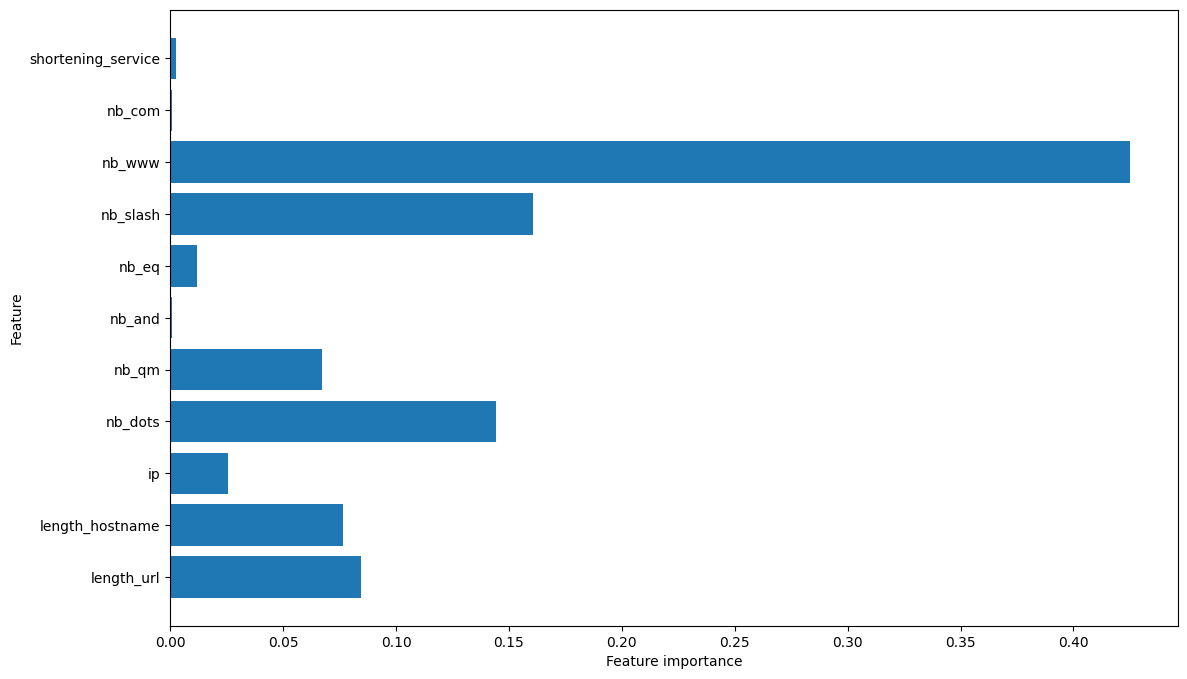

In [126]:
feature_names = ['length_url','length_hostname','ip','nb_dots','nb_qm','nb_and','nb_eq','nb_slash','nb_www','nb_com','shortening_service']

#checking the feature improtance in the model
plt.figure(figsize=(13,8))
n_features = X_train.shape[1]
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features),feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()
     

In [127]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=7)

# start training the model
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=7)

In [128]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# finding accuracy on train dataset
train_acc = accuracy_score(y_train,y_pred_train)
test_acc = accuracy_score(y_test,y_pred_test)

print("Accuracy on Training dataset : ",round(train_acc,3))
print("Accuracy on Testing dataset : ",round(test_acc,3))

Accuracy on Training dataset :  0.801
Accuracy on Testing dataset :  0.797


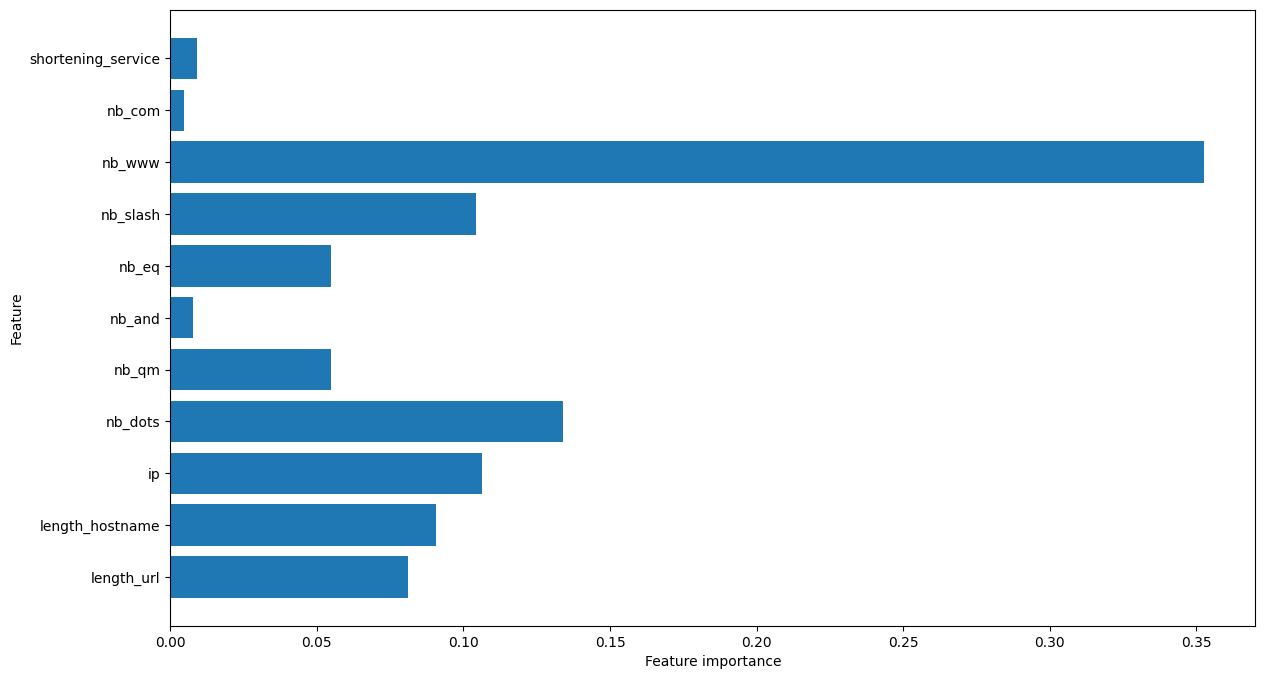

In [129]:
 feature_names = ['length_url','length_hostname','ip','nb_dots','nb_qm','nb_and','nb_eq','nb_slash','nb_www','nb_com','shortening_service']

#checking the feature improtance in the model
#checking the feature improtance in the model
plt.figure(figsize=(14,8))
n_features = X_train.shape[1]
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features),feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [130]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

In [131]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# finding accuracy on train dataset
train_acc = accuracy_score(y_train,y_pred_train)
test_acc = accuracy_score(y_test,y_pred_test)

print("Accuracy on Training dataset : ",round(train_acc,3))
print("Accuracy on Testing dataset : ",round(test_acc,3))

Accuracy on Training dataset :  0.799
Accuracy on Testing dataset :  0.798


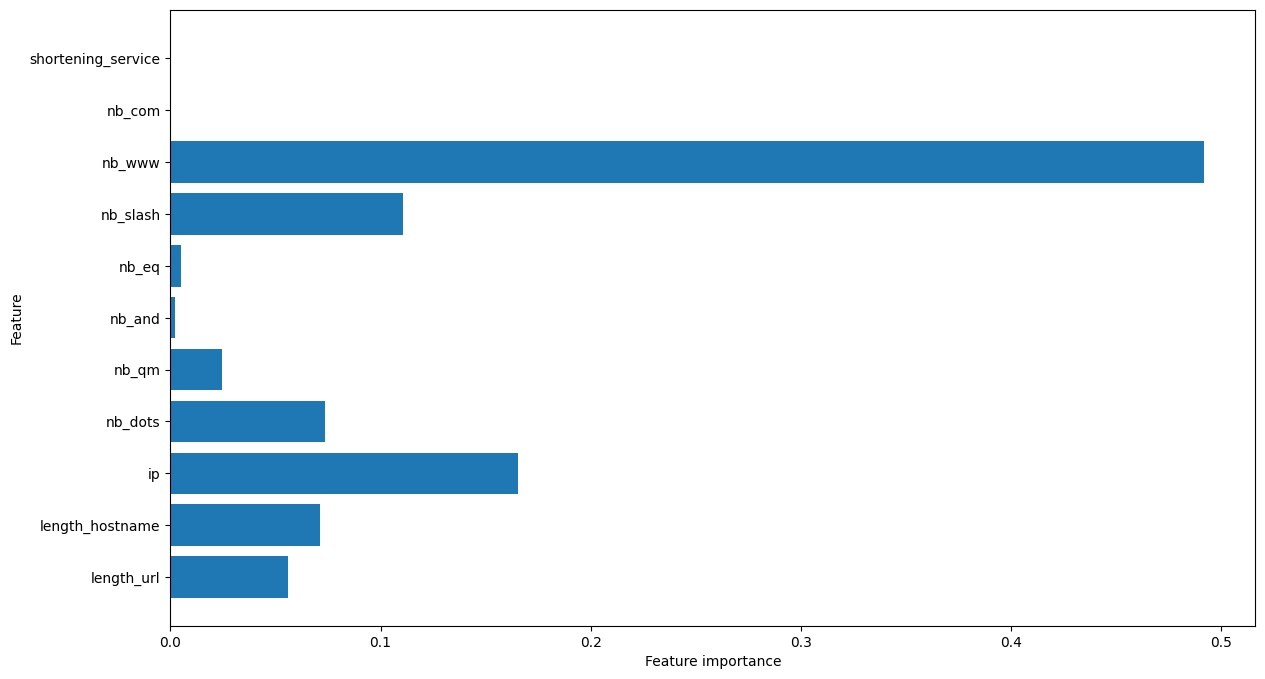

In [132]:
feature_names =['length_url','length_hostname','ip','nb_dots','nb_qm','nb_and','nb_eq','nb_slash','nb_www','nb_com','shortening_service']

#checking the feature improtance in the model
plt.figure(figsize=(14,8))
n_features = X_train.shape[1]
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features),feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [133]:
df_selected.head()

,length_url,length_hostname,ip,nb_dots,nb_qm,nb_and,nb_eq,nb_slash,nb_www,nb_com,shortening_service,status
0,37,19,0,3,0,0,0,3,1,0,0,0
1,77,23,1,1,0,0,0,5,0,0,0,1
2,126,50,1,4,1,2,3,5,0,1,0,1
3,18,11,0,2,0,0,0,2,0,0,0,0
4,55,15,0,2,0,0,0,5,1,0,0,0


In [134]:
from sklearn.svm import SVC

# Create an instance of the SVM classifier
model = SVC()

# Start training the model
model.fit(X_train, y_train)


SVC()

In [135]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# finding accuracy on train dataset
train_acc = accuracy_score(y_train,y_pred_train)
test_acc = accuracy_score(y_test,y_pred_test)

print("Accuracy on Training dataset : ",round(train_acc,3))
print("Accuracy on Testing dataset : ",round(test_acc,3))

Accuracy on Training dataset :  0.689
Accuracy on Testing dataset :  0.688


In [136]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
import seaborn as sns

In [137]:

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "GBM": GradientBoostingClassifier(),
    "SVC":SVC(),
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {name: [] for name in models.keys()}
mean_accuracies = {}
for name, model in models.items():
    accuracies = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    results[name] = accuracies
    mean_accuracies[name] = accuracies.mean()
    print(f"  Mean Accuracy: {accuracies.mean():.4f}, Std: {accuracies.std():.4f}")
results_df = pd.DataFrame(results)

  Mean Accuracy: 0.8156, Std: 0.0055
  Mean Accuracy: 0.8422, Std: 0.0024
  Mean Accuracy: 0.8190, Std: 0.0036
  Mean Accuracy: 0.6893, Std: 0.0077


In [138]:
best_model_name = max(mean_accuracies, key=mean_accuracies.get)
print(best_model_name)
best_model = models[best_model_name]

Random Forest


In [139]:
best_model.fit(X, y)

RandomForestClassifier()

In [140]:
import joblib

In [141]:
joblib.dump(best_model, f'{best_model_name}_model.pkl')

print(f"Best model: {best_model_name} with Mean Accuracy: {mean_accuracies[best_model_name]:.4f}")

Best model: Random Forest with Mean Accuracy: 0.8422


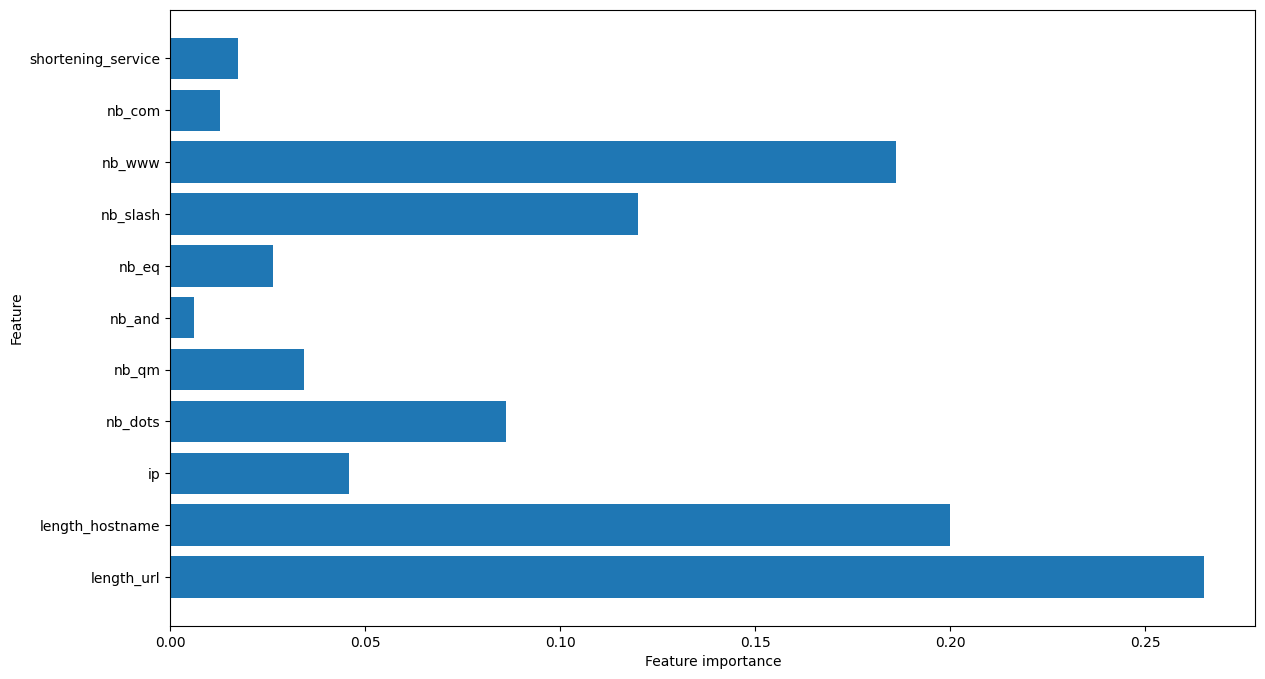

In [142]:
feature_names = ['length_url','length_hostname','ip','nb_dots','nb_qm','nb_and','nb_eq','nb_slash','nb_www','nb_com','shortening_service']
#checking the feature improtance in the model
plt.figure(figsize=(14,8))
n_features = X_train.shape[1]
plt.barh(range(n_features), best_model.feature_importances_, align='center')
plt.yticks(np.arange(n_features),feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()